In [82]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the dataset without headers
data = pd.read_csv('../data/raw/training.1600000.processed.noemoticon.csv', header=None)

# Assign meaningful column names
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Drop the 'query' column as it's not needed
data.drop(columns=['query'], inplace=True)

# Display the first few rows to verify
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   sentiment          id                          date             user  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  _TheSpecialOne_   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009    scotthamilton   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009         mattycus   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009          ElleCTF   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009           Karoli   

                                                text  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


In [83]:
# Ensure 'date' column is treated as a string
data['date'] = data['date'].astype(str)

# Remove the timezone part from 'date' column
data['date'] = data['date'].str.replace(r' [A-Z]{3}', '', regex=True)

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Verify the data type conversion
print("\nData types after converting 'date' column:")
print(data.info())



Data types after converting 'date' column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   sentiment  1600000 non-null  int64         
 1   id         1600000 non-null  int64         
 2   date       1600000 non-null  datetime64[ns]
 3   user       1600000 non-null  object        
 4   text       1600000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 61.0+ MB
None


In [84]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop duplicates if any
data = data.drop_duplicates()

# Verify the removal of duplicates
print("\nData info after removing duplicates:")
print(data.info())



Number of duplicate rows: 0

Data info after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   sentiment  1600000 non-null  int64         
 1   id         1600000 non-null  int64         
 2   date       1600000 non-null  datetime64[ns]
 3   user       1600000 non-null  object        
 4   text       1600000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 61.0+ MB
None


In [85]:
# Function to clean text data
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove non-alphabetic characters (keeping spaces)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the clean_text function to the 'text' column
data['clean_text'] = data['text'].apply(clean_text)

# Display the cleaned text
print(data[['text', 'clean_text']].head())


                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                          clean_text  
0  switchfoot awww thats a bummer you shoulda got...  
1  is upset that he cant update his facebook by t...  
2  kenichan i dived many times for the ball manag...  
3     my whole body feels itchy and like its on fire  
4  nationwideclass no its not behaving at all im ...  


In [86]:
# Check if sentiment values are correctly loaded
print(data['sentiment'].value_counts(dropna=False))

# Map sentiment values to human-readable labels
data['sentiment'] = data['sentiment'].map({0: 'Negative', 4: 'Positive'})

# Print unique sentiment values after mapping
print("Unique sentiment values after mapping:", data['sentiment'].unique())

# Verify the mapping
print(data['sentiment'].value_counts())


sentiment
0    800000
4    800000
Name: count, dtype: int64
Unique sentiment values after mapping: ['Negative' 'Positive']
sentiment
Negative    800000
Positive    800000
Name: count, dtype: int64



Plotting the sentiment distribution:


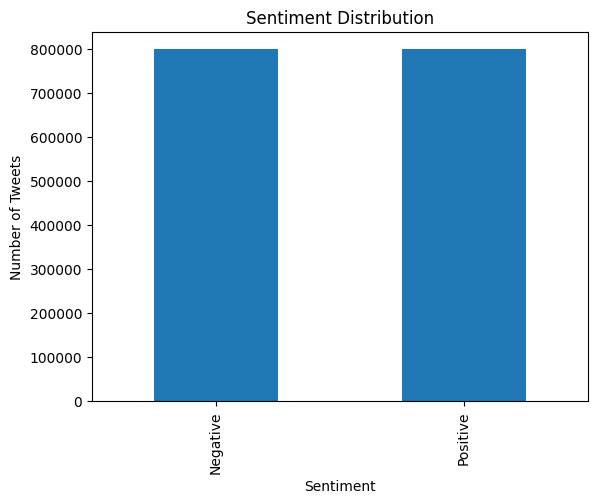

In [87]:
# Plot the sentiment distribution
print("\nPlotting the sentiment distribution:")
if not data['sentiment'].empty:
    data['sentiment'].value_counts().plot(kind='bar')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Tweets')
    plt.title('Sentiment Distribution')
    plt.show()
else:
    print("The 'sentiment' column is empty, cannot plot the sentiment distribution.")



Plotting the top 10 most active users:


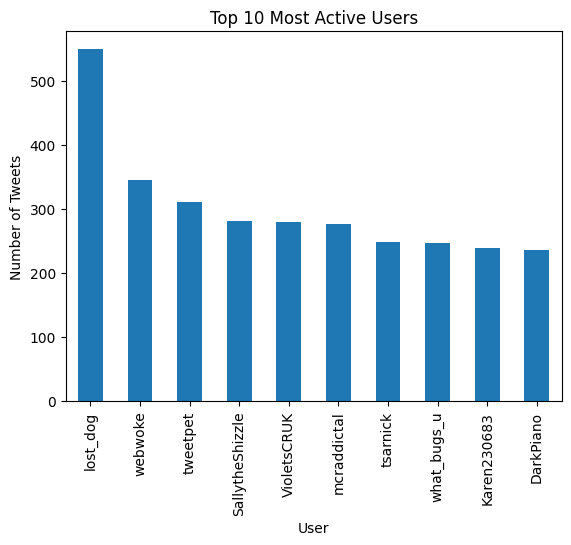

In [88]:
# Plot the top 10 most active users
print("\nPlotting the top 10 most active users:")
if not data['user'].empty:
    top_users = data['user'].value_counts().head(10)
    top_users.plot(kind='bar')
    plt.xlabel('User')
    plt.ylabel('Number of Tweets')
    plt.title('Top 10 Most Active Users')
    plt.show()
else:
    print("The 'user' column is empty, cannot plot the top 10 most active users.")


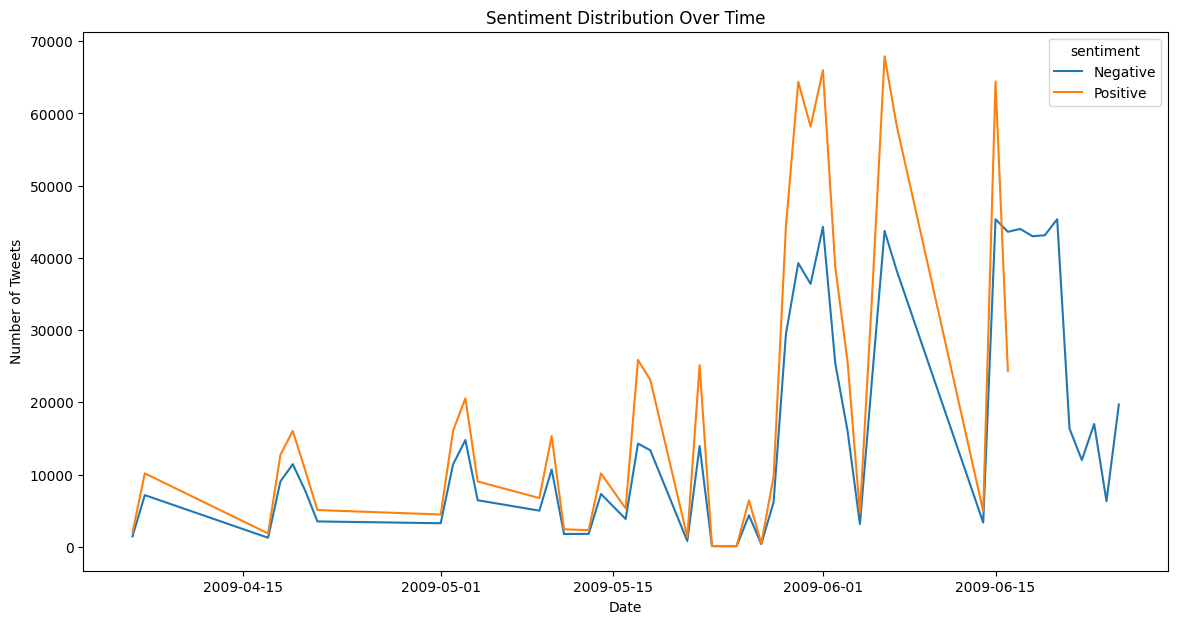

In [89]:
# Group by date and sentiment
sentiment_over_time = data.groupby([data['date'].dt.date, 'sentiment']).size().unstack()

# Plot sentiment distribution over time
if not sentiment_over_time.empty:
    sentiment_over_time.plot(kind='line', figsize=(14, 7))
    plt.xlabel('Date')
    plt.ylabel('Number of Tweets')
    plt.title('Sentiment Distribution Over Time')
    plt.show()
else:
    print("No data to plot sentiment distribution over time.")

In [90]:
import os

# Define the processed directory path
processed_dir = '../data/processed'

# Create the processed directory if it doesn't exist
os.makedirs(processed_dir, exist_ok=True)

# Define the file path for the processed data
processed_file_path = os.path.join(processed_dir, 'training_processed.csv')

# Save the processed data to a CSV file
data.to_csv(processed_file_path, index=False)

print(f"Processed data saved to {processed_file_path}")


Processed data saved to ../data/processed/training_processed.csv
